# Dream Challenge: FINRISK - Heart Failure and Microbiome

### Overview

<div style="text-align: justify"> Cardiovascular diseases are the leading cause of death both in men and women worldwide. Heart failure (HF) is the most common form of heart disease, characterised by the heart's inability to pump a sufficient supply of blood to meet the needs of the body. The lifetime risk of developing HF is roughly 20%, yet, it remains difficult to diagnose due to its and a lack of agreement of diagnostic criteria. As the diagnosis of HF is dependent on ascertainment of clinical histories and appropriate screening of symptomatic individuals, identifying those at risk of HF is essential. <br> <br> This DREAM challenge focuses on the prediction of Heart Failure using a combination of gut microbiome and clinical variables. </div>

<img src="metadata.png"> </img>

 <br> **Fig.1** List of metadata explained. <br> <br> *negative values indicates the occurrence of Heart Failure in participants before the baseline.

------------------------------

# Exploring data

### Loading data

In [66]:
import pandas as pd

# csv's on test folder
pheno_train = r"../train/pheno_training.csv"
read_counts = r"../train/readcounts_training.csv"
taxtable = r"../train/taxtable.csv"


Host phenotype data (pheno_train.csv): Individuals in rows and metadata variables in columns.

In [67]:
pheno_train_df = pd.read_csv(pheno_train)
pheno_train_df.rename(columns={"Unnamed: 0": "Sample_ID"}, inplace=True) # rename the first column to Sample_ID
pheno_train_df["Sample_ID"] = pheno_train_df["Sample_ID"].str.replace("Simulated_", "") # Change Sample_ID to only integer values
pheno_train_df.head()

,Sample_ID,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,328,53.618,24.127,0.000,0,0.000,0.000,0.000,0.000,15.750,133.077,3.020,0
1,1644,36.811,27.992,0.000,0,0.000,0.000,0.000,0.000,15.881,108.914,5.480,0
2,1710,49.429,23.664,0.000,0,0.000,0.000,0.000,0.000,15.891,110.064,4.388,1
3,1732,48.842,26.804,0.000,0,0.000,0.000,0.000,0.000,15.918,128.059,5.119,0
4,1727,60.738,29.862,0.000,0,0.000,0.000,0.000,0.000,15.841,169.913,5.740,1


Taxonomic abundance table (readcounts_train.csv): Individuals in columns and taxon names in rows.

In [68]:
read_counts_df = pd.read_csv(read_counts)
read_counts_df.rename(columns={"Unnamed: 0": "Taxon name"}, inplace=True) # rename the first column to Taxon name
read_counts_df.head()

,Taxon name,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
0,k__Archaea;p__;c__;o__;f__;g__;s__,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Taxonomic mapping table (taxtable.csv): Mapping of the taxonomic species to higher taxonomic hierarchy (Kingdom, Phylum, Class, Order, Family, Genus and Species)

In [69]:
taxtable_df = pd.read_csv(taxtable)
taxtable_df.head()

,Domain,Phylum,Class,Order,Family,Genus,Species
0,k__Archaea,p__,c__,o__,f__,g__,s__
1,k__Archaea,p__Candidatus_Korarchaeota,c__,o__,f__,g__,s__
2,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__,f__,g__,s__
3,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Acidilobaceae,g__Acidilobus,s__Acidilobus_saccharovorans
4,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Caldisphaeraceae,g__Caldisphaera,s__Caldisphaera_lagunensis


### Data structure verification

Number of rows and columns of each dataframe

In [70]:
print(f"The Host Phenotype data has {pheno_train_df.shape[0]} rows and {pheno_train_df.shape[1]} columns")
print(f"The Taxonomic abundance table has {read_counts_df.shape[0]} rows and {read_counts_df.shape[1]} columns")
print(f"The Taxonomic mapping table has {taxtable_df.shape[0]} rows and {taxtable_df.shape[1]} columns")

The Host Phenotype data has 3615 rows and 13 columns
The Taxonomic abundance table has 5748 rows and 3616 columns
The Taxonomic mapping table has 5748 rows and 7 columns


The column names

In [71]:
print(list(pheno_train_df.columns))
# print(list(read_counts_df.columns)) # this prints the columns of the readcounts csv which are the sample ID's (3616 columns)
print(list(taxtable_df.columns))

['Sample_ID', 'Age', 'BodyMassIndex', 'Smoking', 'BPTreatment', 'PrevalentDiabetes', 'PrevalentCHD', 'PrevalentHFAIL', 'Event', 'Event_time', 'SystolicBP', 'NonHDLcholesterol', 'Sex']
['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


Type of data in each column

In [72]:
print(pheno_train_df.dtypes)

Sample_ID             object
Age                  float64
BodyMassIndex        float64
Smoking              float64
BPTreatment            int64
PrevalentDiabetes    float64
PrevalentCHD         float64
PrevalentHFAIL       float64
Event                float64
Event_time           float64
SystolicBP           float64
NonHDLcholesterol    float64
Sex                    int64
dtype: object


In [73]:
print(read_counts_df.dtypes)

Taxon name        object
Simulated_328      int64
Simulated_1644     int64
Simulated_1710     int64
Simulated_1732     int64
                   ...  
Simulated_1783     int64
Simulated_3425     int64
Simulated_1789     int64
Simulated_1592     int64
Simulated_1731     int64
Length: 3616, dtype: object


In [74]:
print(taxtable_df.dtypes)

Domain     object
Phylum     object
Class      object
Order      object
Family     object
Genus      object
Species    object
dtype: object


Range of values

In [75]:
for col in pheno_train_df.columns:
    print(f"{col}:                {pheno_train_df[col].min()} ----------------- {pheno_train_df[col].max()}")

Sample_ID:                10 ----------------- 999
Age:                24.098 ----------------- 74.242
BodyMassIndex:                15.839 ----------------- 56.935
Smoking:                0.0 ----------------- 1.0
BPTreatment:                0 ----------------- 1
PrevalentDiabetes:                0.0 ----------------- 1.0
PrevalentCHD:                0.0 ----------------- 1.0
PrevalentHFAIL:                0.0 ----------------- 1.0
Event:                0.0 ----------------- 1.0
Event_time:                -23.709 ----------------- 16.0
SystolicBP:                88.097 ----------------- 253.075
NonHDLcholesterol:                1.558 ----------------- 12.988
Sex:                0 ----------------- 1


In [76]:
for col in read_counts_df.columns[1:]:
    print(f"{col}:               {read_counts_df[col].min()} --------------------- {read_counts_df[col].max()}")

Simulated_328:               0 --------------------- 276290
Simulated_1644:               0 --------------------- 469820
Simulated_1710:               0 --------------------- 359562
Simulated_1732:               0 --------------------- 279370
Simulated_1727:               0 --------------------- 98275
Simulated_2196:               0 --------------------- 79766
Simulated_1681:               0 --------------------- 73865
Simulated_1651:               0 --------------------- 77094
Simulated_1603:               0 --------------------- 569000
Simulated_1601:               0 --------------------- 64523
Simulated_1790:               0 --------------------- 104589
Simulated_1586:               0 --------------------- 17536
Simulated_3624:               0 --------------------- 70936
Simulated_2206:               0 --------------------- 70531
Simulated_1792:               0 --------------------- 308486
Simulated_1585:               0 --------------------- 85395
Simulated_1723:               0 --

Missing values

In [77]:
pheno_train_df.isna().sum()

Sample_ID             0
Age                   0
BodyMassIndex         1
Smoking              16
BPTreatment           0
PrevalentDiabetes    51
PrevalentCHD         51
PrevalentHFAIL       51
Event                51
Event_time           51
SystolicBP            0
NonHDLcholesterol     7
Sex                   0
dtype: int64

In [78]:
null_data = pheno_train_df[pheno_train_df.isna().any(axis=1)]
null_data.head()

,Sample_ID,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
47,2222,46.231,30.896,0.000,1,NaN,NaN,NaN,NaN,NaN,95.056,2.891,0
61,1338,55.991,36.779,NaN,0,0.000,0.000,0.000,1.000,15.821,117.944,4.359,0
69,1616,55.978,28.089,NaN,0,0.000,0.000,0.000,0.000,14.501,120.971,5.859,1
85,1320,31.021,23.127,0.000,0,NaN,NaN,NaN,NaN,NaN,122.928,3.531,0
128,1405,55.459,23.091,0.000,1,NaN,NaN,NaN,NaN,NaN,122.039,3.000,0


In [79]:
read_counts_df.isna().sum().sum()

0

In [80]:
taxtable_df.isna().sum()

Domain      0
Phylum      0
Class       0
Order       0
Family      0
Genus       0
Species    35
dtype: int64

In [81]:
null_data_taxtable = taxtable_df[taxtable_df.isna().any(axis=1)]
null_data_taxtable.head()

,Domain,Phylum,Class,Order,Family,Genus,Species
5662,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Adenoviridae,o__,f__,g__,NaN
5663,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Ascoviridae,o__,f__,g__,NaN
5664,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Baculoviridae,o__,f__,g__,NaN
5665,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Caudovirales,o__,f__,g__,NaN
5666,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Herpesvirales,o__,f__,g__,NaN


#### Treating missing values on Host phenotype data

For the BodyMaxIndex column we will use the mean of that column to subtitute the missing value

In [82]:
body_mass_index_mean = pheno_train_df["BodyMassIndex"].mean()
pheno_train_df["BodyMassIndex"] = pheno_train_df["BodyMassIndex"].fillna(body_mass_index_mean)

For the smoking variable we will use mode imputation.

In [83]:
mode_smoking = pheno_train_df["Smoking"].mode()[0]
pheno_train_df["Smoking"] = pheno_train_df["Smoking"].fillna(mode_smoking)

For the PrevalentDiabetes we will use mode imputation.

In [84]:
mode_diabetes = pheno_train_df["PrevalentDiabetes"].mode()[0]
pheno_train_df["PrevalentDiabetes"] = pheno_train_df["PrevalentDiabetes"].fillna(mode_diabetes)

For the PrevalentCHD variable we will use mode imputation.

In [85]:
mode_chd = pheno_train_df["PrevalentCHD"].mode()[0]
pheno_train_df["PrevalentCHD"] = pheno_train_df["PrevalentCHD"].fillna(mode_chd)

For the PrevalentHFAIL variable we will also use mode imputation.

In [86]:
mode_hfail = pheno_train_df["PrevalentHFAIL"].mode()[0]
pheno_train_df["PrevalentHFAIL"] = pheno_train_df["PrevalentHFAIL"].fillna(mode_hfail)

For the Event variable we will also use mode imputation.

In [87]:
mode_event = pheno_train_df["Event"].mode()[0]
pheno_train_df["Event"] = pheno_train_df["Event"].fillna(mode_event)

For the Event_time variable we will use mean imputation

In [88]:
mean_time = pheno_train_df["Event_time"].mean()
pheno_train_df["Event_time"] = pheno_train_df["Event_time"].fillna(mean_time)

For the NonHDLcholesterol variable we will use mean imputation.

In [89]:
mean_cholesterol = pheno_train_df["NonHDLcholesterol"].mean()
pheno_train_df["NonHDLcholesterol"] = pheno_train_df["NonHDLcholesterol"].fillna(mean_cholesterol)

In [90]:
pheno_train_df.isna().sum() # no missing values

Sample_ID            0
Age                  0
BodyMassIndex        0
Smoking              0
BPTreatment          0
PrevalentDiabetes    0
PrevalentCHD         0
PrevalentHFAIL       0
Event                0
Event_time           0
SystolicBP           0
NonHDLcholesterol    0
Sex                  0
dtype: int64

#### Treating missing values on Taxonomic mapping table (taxtable)

In [91]:
taxtable_df.isna().sum()

Domain      0
Phylum      0
Class       0
Order       0
Family      0
Genus       0
Species    35
dtype: int64

In [92]:
taxtable_df["Species"] = taxtable_df["Species"].fillna("Unidentified Species")

### Data summary

In [93]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pheno_train_df.describe()

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
count,3615.000,3615.000,3615.000,3615.000,3615.000,3615.000,3615.000,3615.000,3615.000,3615.000,3615.000,3615.000
mean,49.504,27.071,0.232,0.155,0.061,0.032,0.026,0.083,13.756,136.341,4.086,0.444
std,14.848,4.723,0.422,0.362,0.239,0.177,0.158,0.276,5.646,22.038,1.091,0.497
min,24.098,15.839,0.000,0.000,0.000,0.000,0.000,0.000,-23.709,88.097,1.558,0.000
25%,36.808,23.776,0.000,0.000,0.000,0.000,0.000,0.000,15.738,120.019,3.338,0.000
50%,50.909,26.402,0.000,0.000,0.000,0.000,0.000,0.000,15.820,132.962,3.991,0.000
75%,61.759,29.499,0.000,0.000,0.000,0.000,0.000,0.000,15.881,149.062,4.721,1.000
max,74.242,56.935,1.000,1.000,1.000,1.000,1.000,1.000,16.000,253.075,12.988,1.000


In [94]:
read_counts_df.describe()

,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,Simulated_1601,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
count,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,...,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000
mean,187.730,201.291,129.468,273.374,116.749,132.382,55.175,87.517,468.192,134.720,...,252.920,132.894,175.411,99.844,223.180,397.058,108.616,50.392,57.360,294.581
std,4045.491,7845.599,4853.531,5765.580,1893.995,1971.111,1275.435,1724.518,9934.202,1786.721,...,3938.187,1983.863,2897.489,1834.970,8178.722,7679.974,1542.725,1129.105,1121.718,5056.226
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2.000,0.000,1.000,2.000,1.000,2.000,0.000,0.000,1.000,1.000,...,1.000,0.000,1.000,1.000,0.000,2.000,1.000,1.000,1.000,2.000
max,276290.000,469820.000,359562.000,279370.000,98275.000,79766.000,73865.000,77094.000,569000.000,64523.000,...,141863.000,84802.000,93681.000,98023.000,602477.000,398096.000,72741.000,73522.000,62928.000,245420.000


In [95]:
taxtable_df.describe()

,Domain,Phylum,Class,Order,Family,Genus,Species
count,5748,5748,5748,5748,5748,5748,5748
unique,5,51,150,174,370,1480,4536
top,k__Bacteria,p__Proteobacteria,c__Actinobacteria,o__Bacillales,f__Flavobacteriaceae,g__,s__
freq,5024,2215,916,391,196,346,845


## Statistical tests

BodyMassIndex ----->    P-VALUE:      7.756730899351182e-34
Event_time ----->    P-VALUE:      0.0
NonHDLcholesterol ----->    P-VALUE:      5.723465912999794e-25
SystolicBP ----->    P-VALUE:      8.417582262396532e-30


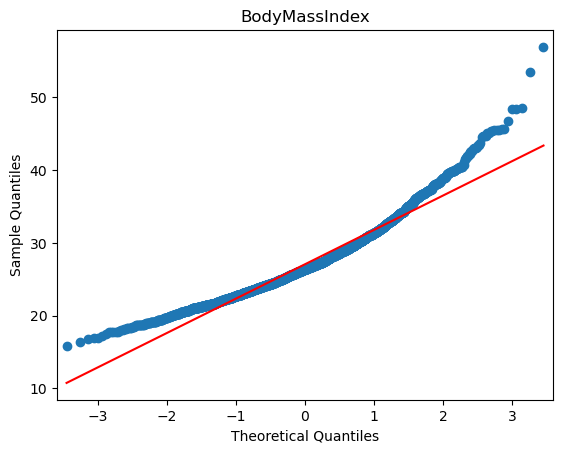

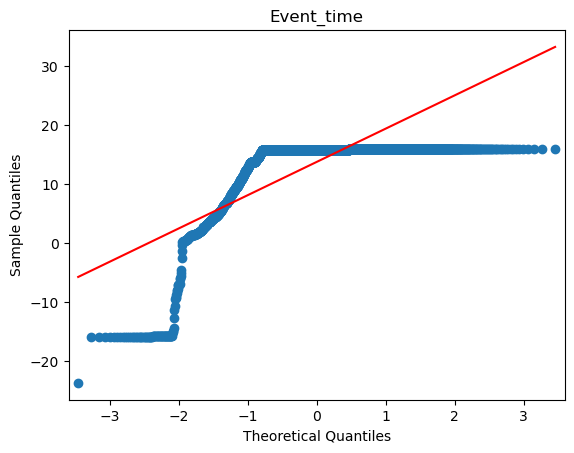

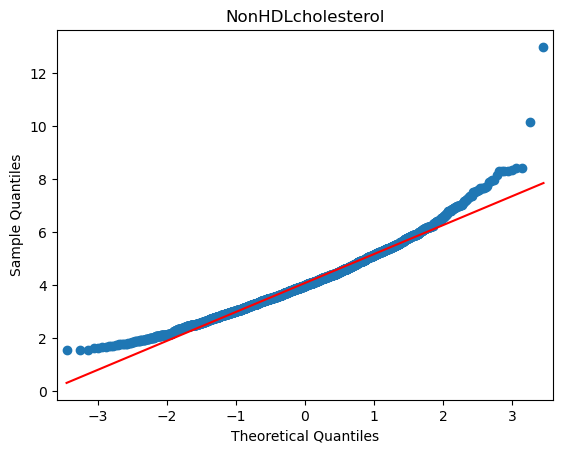

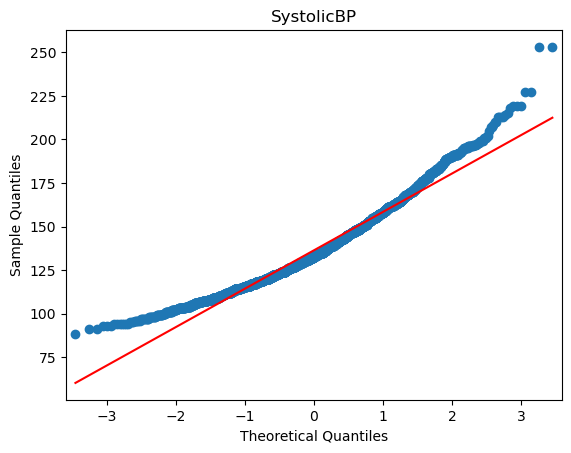

In [96]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt



columns_to_plot = pheno_train_df.columns.difference(["Sample_ID", "Sex", "Age", "Event", "Smoking", "BPTreatment", "PrevalentDiabetes", "PrevalentCHD", "PrevalentHFAIL"])

for col in columns_to_plot:
    data = pheno_train_df[col]
    
    fig = qqplot(data, dist=norm, line="s")
    plt.title(col)
    print(f"{col} ----->    P-VALUE:      {shapiro(pheno_train_df[col]).pvalue}")

# Exploring test datasets

### Loading data

In [97]:
# csv's on test folder
pheno_test = r"../test/pheno_test.csv"
read_test = r"../test/readcounts_test.csv"
taxtable_test = r"../test/taxtable.csv"

Host phenotype data (pheno_test.csv): Individuals in rows and metadata variables in columns. Change first feature to appropriate name.

In [98]:
pheno_test_df = pd.read_csv(pheno_test)
pheno_test_df.rename(columns={"Unnamed: 0": "Sample_ID"}, inplace=True) # rename the first column to Sample_ID
pheno_test_df["Sample_ID"] = pheno_test_df["Sample_ID"].str.replace("Simulated_", "") # Change Sample_ID to only integer values
pheno_test_df.head()

,Sample_ID,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,2211,73.860,30.140,1.000,1,0.000,0.000,0.000,0.000,15.910,154.046,5.010,0
1,1629,48.070,18.252,1.000,0,0.000,0.000,0.000,0.000,11.189,184.064,3.922,0
2,1690,49.060,25.911,0.000,0,0.000,0.000,0.000,1.000,15.832,126.922,5.119,1
3,1367,58.499,25.739,0.000,0,0.000,0.000,0.000,0.000,15.818,141.003,3.890,1
4,3387,47.242,29.227,0.000,0,0.000,0.000,0.000,0.000,15.782,143.021,3.611,1


Taxonomic abundance table (readcounts_test.csv): Individuals in columns and taxon names in rows. Change first feature to apropriate name.

In [99]:
read_test_df = pd.read_csv(read_test)
read_test_df.rename(columns={"Unnamed: 0": "Taxon name"}, inplace=True) # rename the first column to Taxon name
read_test_df.head()

,Taxon name,Simulated_2211,Simulated_1629,Simulated_1690,Simulated_1367,Simulated_3387,Simulated_1746,Simulated_3625,Simulated_1596,Simulated_3430,...,Simulated_1743,Simulated_1357,Simulated_1372,Simulated_1326,Simulated_1696,Simulated_1628,Simulated_3424,Simulated_2215,Simulated_3426,Simulated_1679
0,k__Archaea;p__;c__;o__;f__;g__;s__,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Taxonomic mapping table (taxtable.csv): Mapping of the taxonomic species to higher taxonomic hierarchy (Kingdom, Phylum, Class, Order, Family, Genus and Species)

In [100]:
taxtable_test_df = pd.read_csv(taxtable)
taxtable_test_df.head()

,Domain,Phylum,Class,Order,Family,Genus,Species
0,k__Archaea,p__,c__,o__,f__,g__,s__
1,k__Archaea,p__Candidatus_Korarchaeota,c__,o__,f__,g__,s__
2,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__,f__,g__,s__
3,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Acidilobaceae,g__Acidilobus,s__Acidilobus_saccharovorans
4,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Caldisphaeraceae,g__Caldisphaera,s__Caldisphaera_lagunensis


## Data structure verification

Number of columns and rows of eacch dataframe

In [101]:
print(f"The Host Phenotype data has {pheno_test_df.shape[0]} rows and {pheno_test_df.shape[1]} columns")
print(f"The Taxonomic abundance table has {read_test_df.shape[0]} rows and {read_test_df.shape[1]} columns")
print(f"The Taxonomic mapping table has {taxtable_test_df.shape[0]} rows and {taxtable_test_df.shape[1]} columns")

The Host Phenotype data has 1809 rows and 13 columns
The Taxonomic abundance table has 5748 rows and 1810 columns
The Taxonomic mapping table has 5748 rows and 7 columns
